# Global Scaling on Tea Store

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Define some constant for plots

In [7]:
LANG="en_US.UTF-8"
LANGUAGE="en_US.UTF-8"
LC_ALL="en_US.UTF-8"

sns.set(font='Jetbrains Mono') # Set font


facecolor_reactive_local = [111/255, 178/255, 228/255, .85]
edgecolor_reactive_local = [111/255, 178/255, 228/255, 1.]
label_reactive_local = "Reactive Local Scaling"

facecolor_oracle_local = [150/255, 150/255, 188/255, .85]
edgecolor_oracle_local = [150/255, 150/255, 188/255, 1.]
label_oracle_local = "Oracle Local Scaling"

facecolor_reactive_global = [48/255, 112/255, 173/255, .85]
edgecolor_reactive_global = [48/255, 112/255, 173/255, 1.]
label_reactive_global = "Reactive Global Scaling"

facecolor_proactive_global = [221/255, 162/255, 55/255, .85]
edgecolor_proactive_global = [221/255, 162/255, 55/255, 1.]
label_proactive_global = "Proactive Global Scaling"

facecolor_hybrid = [204/255, 121/255, 167/255, .85]
edgecolor_hybrid = [204/255, 121/255, 167/255, 1.]
label_hybrid = "Proactive-Reactive Global Scaling"

facecolor_oracle = [.27, .61, .46, .85]
edgecolor_oracle = [70/255, 156/255, 118/255, 1.]
label_oracle_global = "Oracle Global Scaling"

facecolor_others = [213/255, 94/255, 0., .85]
edgecolor_others = [213/255, 94/255, 0., 1.]
label_others = "Urgaonkar et al."

## Reactive Local vs Reactive Global Enron

In [8]:
data_folder = 'newData/'
data_files = ['reactive_local.txt', 'reactive_global.txt']

target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
steps = [50, 10, 200]

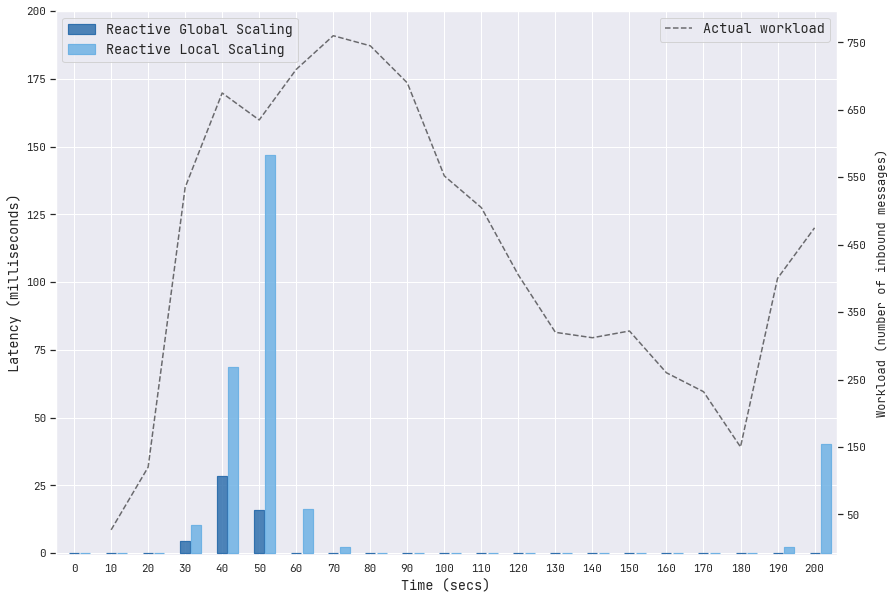

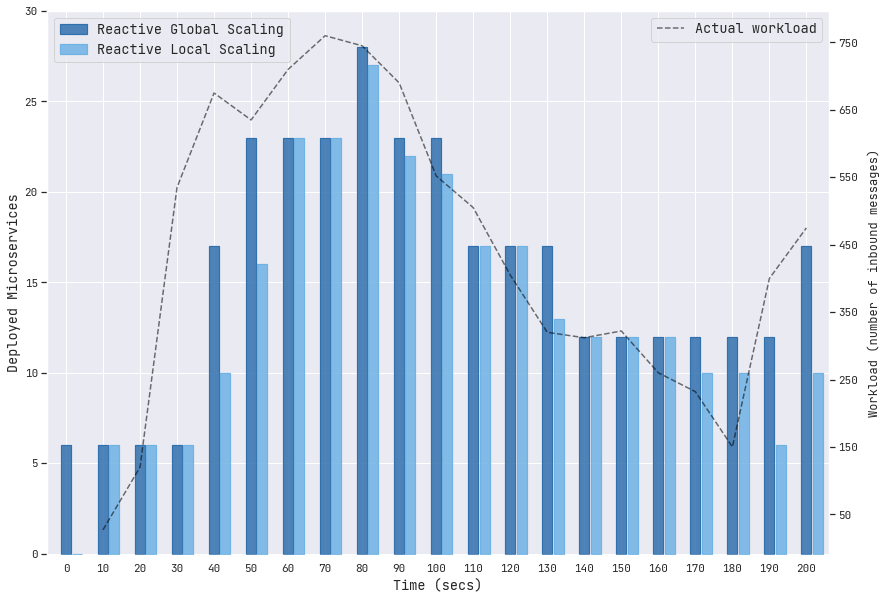

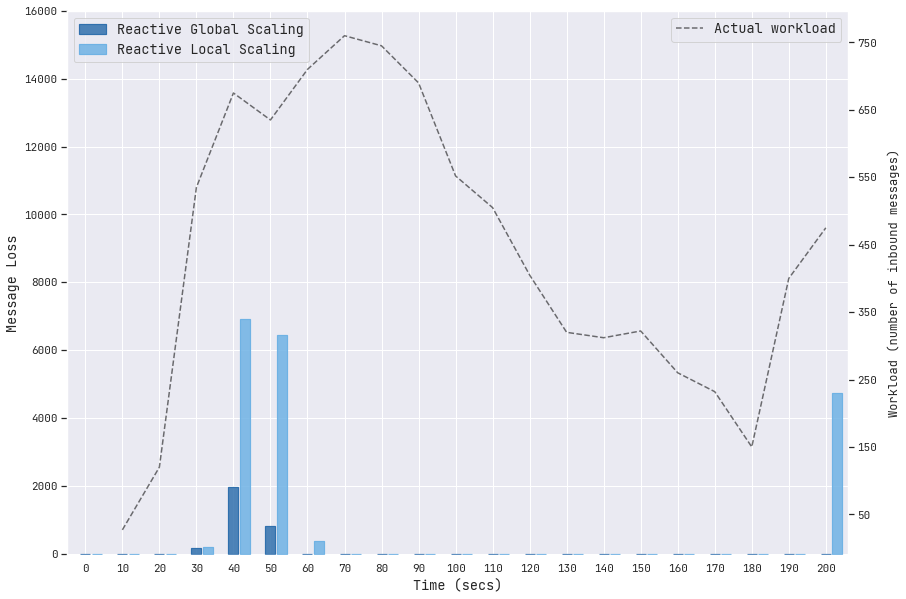

In [10]:
usecols_global = [0,1,3,5,7,11]
usecols_local = [0,1,3,5,7,9]

column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Scale Target",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]
dfs = {}
for file in data_files:
    scenario = file.split('_')[1][:-4]
    if scenario == 'global': cols = usecols_global
    else: cols = usecols_local
    df = pd.read_csv(
            data_folder+file, 
            delim_whitespace=True,
            usecols=cols,
            names=column_names,
            skiprows=[])
    dfs[scenario] = df

        
for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = dfs['global']['Time (ms)']
    y_msgs = dfs['global']['Measured Scale Target']
    y_global = dfs['global'][target_col]
    y_local = dfs['local'][target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 200
        down = -.5
    elif save_label == 'deployed_instaces':
        up = 30
        down = -.05
    else:
        up = 16000
        down = -30


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_reactive_local,
        edgecolor=edgecolor_reactive_local,
        linewidth=1.2,
        label=label_reactive_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'images/{save_label}_reactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')


## Oracle Local vs Reactive Global Scaling Enron

In [11]:
data_folder = 'newData/'
data_files = ['oracle_local.txt', 'reactive_global.txt']

target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
steps = [50, 10, 200]

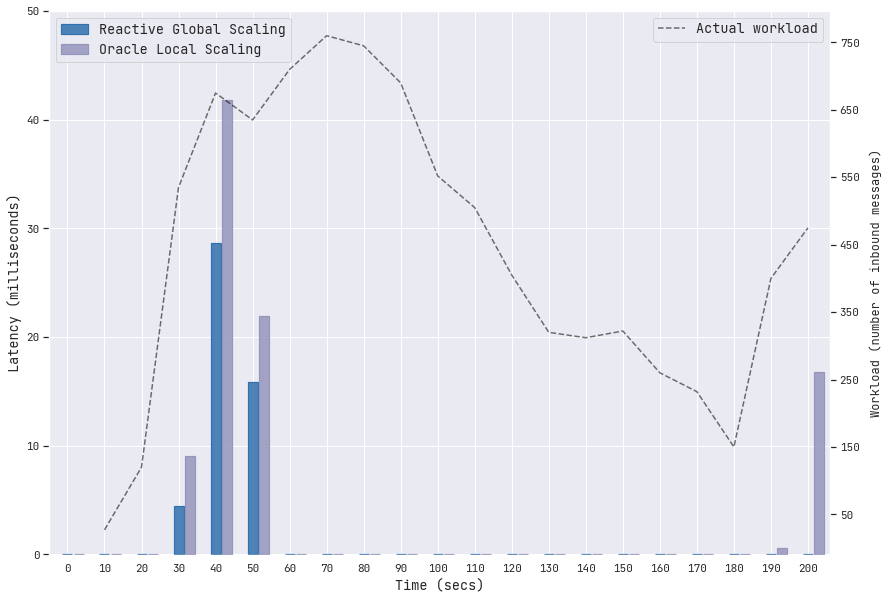

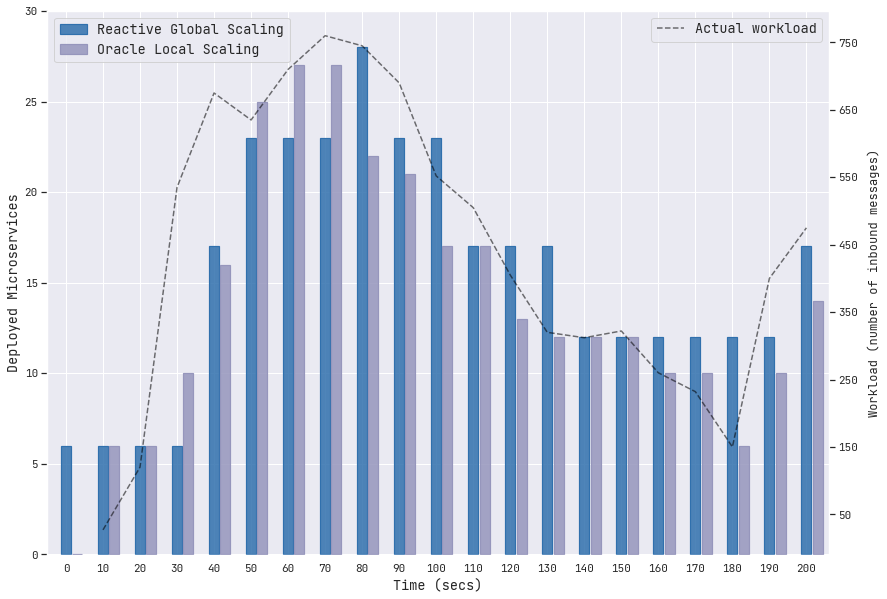

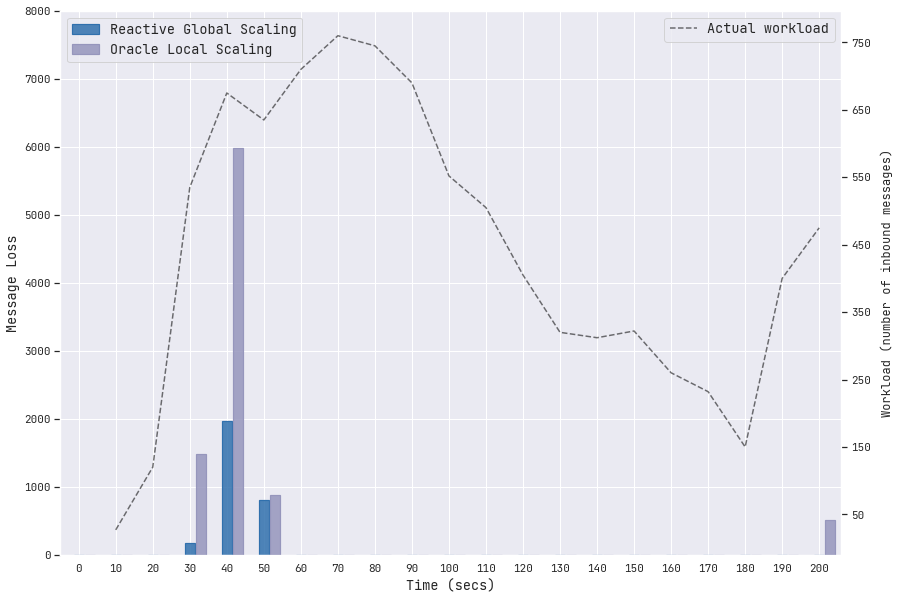

In [17]:
usecols_global = [0,1,3,5,7,11]
usecols_local = [0,1,3,5,7,9]

column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Scale Target",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]
dfs = {}
for file in data_files:
    scenario = file.split('_')[1][:-4]
    if scenario == 'global': cols = usecols_global
    else: cols = usecols_local
    df = pd.read_csv(
            data_folder+file, 
            delim_whitespace=True,
            usecols=cols,
            names=column_names,
            skiprows=[])
    dfs[scenario] = df
        
for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = dfs['global']['Time (ms)']
    y_msgs = dfs['global']['Measured Scale Target']
    y_global = dfs['global'][target_col]
    y_local = dfs['local'][target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    
    width = 2.7

    if save_label == 'latency':
        up = 50
        down = -.01
    elif save_label == 'deployed_instaces':
        up = 30
        down = -.01
    else:
        up = 8000
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_oracle_local,
        edgecolor=edgecolor_oracle_local,
        linewidth=1.2,
        label=label_oracle_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'images/{save_label}_oracleReactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')


In [ ]:
area_glob = np.trapz(dfs['global']['Latency'], dx=5)
print("area glob =", area_glob)
area_local = np.trapz(y_local, dx=5)
print("area local =", area_local)

## Proactive Global vs Proactive-Reactive Global Outliers

In [29]:
data_folder = 'newData/'
data_files = ['proactive-reactive_outliers_global.txt', 'proactive_outliers_global.txt', 'oracle_outliers_global.txt']

target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss', 'Cost (USD)']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss', 'Hourly cost per VM (USD)']
save_labels = ['latency', 'deployed_instaces']#, 'loss']
steps = [50, 10, 200, .01]

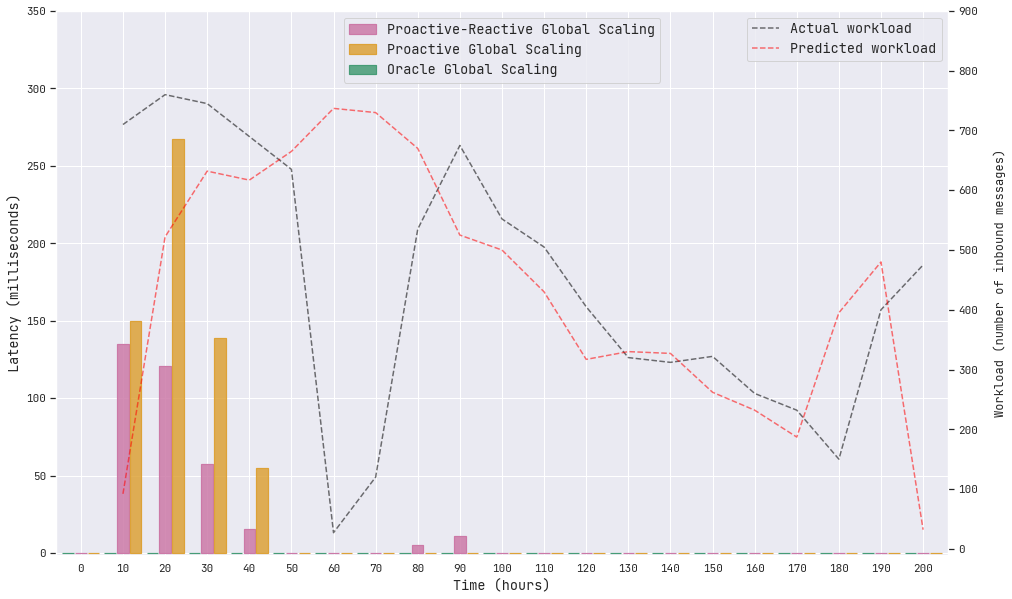

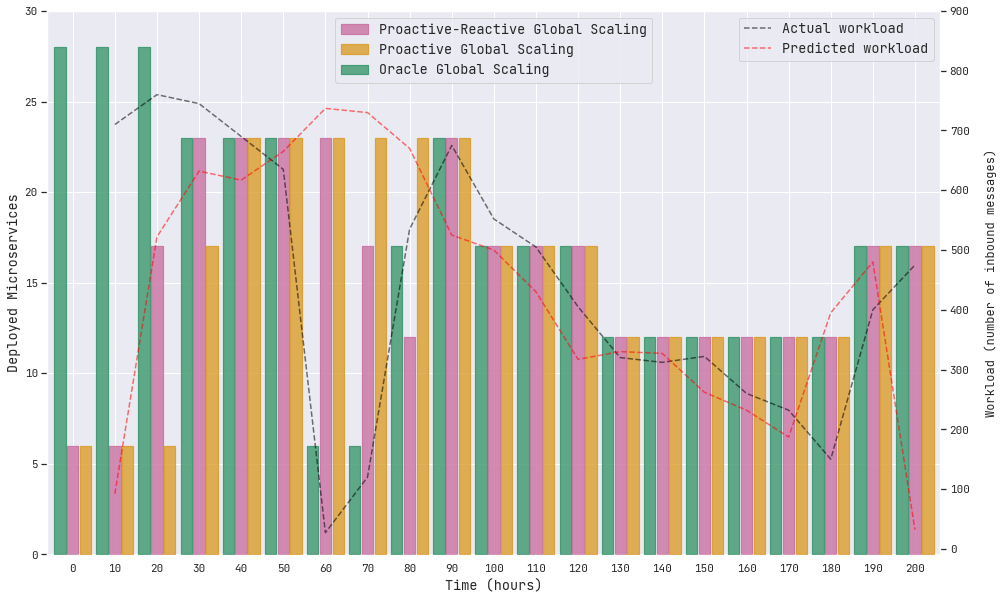

In [30]:
usecols_oracle = [0,1,5,7,9,11,13]
usecols_proactive_reactive = [0,1,7,9,11,13,15]
usecols_proactive = [0,1,3,7,9,11,13]

column_names = [
    "Time (ms)",
    "Latency (ms)",
    "Scale Target",
    "Completed msgs",
    "Message Loss",
    "Supported msgs",
    "Deployed instances",
]
dfs = {}
for file in data_files:
    scenario = file.split('_')[0]
    if scenario == 'proactive-reactive': cols = usecols_proactive_reactive
    elif scenario == 'oracle': cols = usecols_oracle
    else: cols = usecols_proactive
    df = pd.read_csv(
            data_folder+file, 
            delim_whitespace=True,
            usecols=cols,
            names=column_names,
            skiprows=[])
    dfs[scenario] = df
    
for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = dfs['oracle']['Time (ms)']
    y_msgs = dfs['oracle']['Scale Target']
    y_pred = dfs['proactive']['Scale Target']
    y_global = dfs['proactive-reactive'][target_col]
    y_proactive = dfs['proactive'][target_col]
    y_oracle = dfs['oracle'][target_col]
    fig = plt.figure(figsize=[16,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 350
        down = -1
    elif save_label == 'deployed_instaces':
        up = 30
        down = -.01
    else:
        up = 7000
        down = -1



    # define plots
    pr = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_hybrid,
        edgecolor=edgecolor_hybrid,
        linewidth=1.2,
        label=label_hybrid,
        zorder=1,
        width=width,
    )

    p = ax.bar(
        x+width+0.35, 
        y_proactive, 
        linestyle='solid', 
        facecolor=facecolor_proactive_global,
        edgecolor=edgecolor_proactive_global,
        linewidth=1.2,
        label=label_proactive_global, 
        zorder=10,
        width=width,
    )
    
    o = ax.bar(
        x-width-0.35, 
        y_oracle, 
        linestyle='solid',
        facecolor=facecolor_oracle,
        edgecolor=edgecolor_oracle,
        linewidth=1.2,
        label=label_oracle_global, 
        zorder=10,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)
    predicted_msgs = ax_background.plot(x[1:], y_pred[1:], linestyle='dashed', label='Predicted workload', color='red', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-6, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (hours)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
   # ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(0, 1000, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper center', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./images/{save_label}_outliers_proactive_reactiveG_vs_proactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')
